<hr/>

# Data Mining

10/10/2019

**Hanyao(Amy) Qiu** - hqiu11@jhu.edu <br/>
**Office Hour** - F 10:30am ~ 11:30am $~$ Whitehead 212 (Whitehead Hall Second Level Common Area) <br/>
**Section**$~~~~~~$ - Th 4:30pm ~ 5:20pm $~~~$ Shaffer 302
<br>

## Section 6 

- **Bayesian Inference**: Bayes' Theorem, Probabilitistic Model
- **Classification**: KNN, Iris Dataset
-  Q & A
<hr/>

### Bayes' Theorem

Bayes' theorem is stated mathematically as the following equation:

$\displaystyle P(A \lvert B) = \frac{P(A)\,P(B \lvert A)}{P(B)}$ 

where A and B are events and $P(B)\neq 0$.

### Example

> Among some observed objects 1% belongs to a special type, e.g., quasars mixed with many stars. Using a classification method 99% of these special objects can be correctly selected. This method also selects 0.5% of the other types of objects erroneously.

> What is the probability of having a special type if an object is selected by the method?

> #### Solution:

> A: Have a special type
> B: Selected by the method

> $P(A) = 0.01$ <br>
> $P(B|A) = 0.99$ <br>
> $P(B|\bar A) = 0.005$ <br>

>$P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\bar A)P(\bar A)}
        = \frac{0.99 \cdot 0.01}{0.99 \cdot 0.01+0.99 \cdot 0.005} = \frac{2}{3}$

### Probabilitistic Model

- From data $D$ we can **infer** the parameters $\theta$ 

> \begin{eqnarray}
    p(\theta \lvert D) = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}
     = \frac{p(\theta)\,p(D \lvert \theta)}{\int p(\theta)\,p(D \lvert \theta) \, d\theta}
     \propto p(\theta)\,p(D \lvert \theta),
\end{eqnarray}

> where $Z = \int p(\theta)\,p(D \lvert \theta) \, d\theta$ is a normalizing constant

- Posterior $\propto$ Prior $\times$ Likelihood

> The **posterior** is proportional to the **prior** times the **likelihood function** 



>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

> or

>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$


- data in the likelihood funtion

### Likelihood Function
- A set of (conditionally) ***independent*** measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_D(\theta) = p(D \lvert \theta) = p(\{x_i\} \lvert\,\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{i}(\theta)$

- Maximum Likelihood Estimation (MLE) 

> E.g., Gaussians... cf. method of least squares

### Example

Each female of age 65 or over in the General Social Survey was asked
whether or not they were generally happy. Let $Y_i = 1$ if respondent $i$ reported
being generally happy, and let $Y_i = 0$ otherwise. Our data have $n = 129$ independent individuals. 
> $\theta$ is the probability that people felt happy.

> our beliefs about $\theta = \sum_{i=1}^{N} Y_i / N $; (total population mean)

> the model that, conditional on $\theta$, the $Y_i$’s are i.i.d. binary random variables
with expectation $\theta$.

The last item says that the probability for any potential outcome $\{y_1, ..., y_{129}\}$,
conditional on $\theta$, is given by
> the probability i th person felt happy is $P(y_i)=\theta^{y_i}(1-\theta)^{1-y_i}$  （Bernoulli distribution）

> so $P(y_1, ..., y_{129} | \theta) = \theta^{\sum_{i=1}^{129} y_i} (1-\theta)^{129 - \sum_{i=1}^{129} y_i}$

> $ P(\theta | y_1, ..., y_{129}) = \frac{P(y_1, ..., y_{129} | \theta) P(\theta)}{P(y_1, ..., y_{129})} \propto P(y_1, ..., y_{129} | \theta) P(\theta) $

What remains to be specified is our prior distribution.

### Exercise: numerical intergration in 1D 

> Implement Bayes' rule to infer a constant based on $N$ (independent) measurements

>0. Assume Gaussian likelihood with $\sigma=1$ and improper prior

>0. Use function `np.trapz(f,x)` for numerical integration

>0. Start from the code below 

### Unhomework

- Try different priors in the numerical inference example! 

> Does the result change? 
><br><br>
> How about with more or fewer measurements?

- Implement the example using different integration techniques

> Sample from prior density function or likelihood function to derive the expectation value and variance

>$\displaystyle p(\mu|D) = \frac{\pi(\mu) \prod {\ell}_i(\mu)}{\int \pi(\mu) \prod {\ell}_i(\mu)\,d\mu}\ $ 

>$\displaystyle \ell_{i}(\mu) = \frac{1}{\sqrt{2\pi\sigma_i^2}}\ \exp\left\{-\frac{(x_i-\mu)^2}{2\sigma_i^2}\right\}$

> $\pi(\mu)$ -> prior

In [ ]:
%pylab inline

#### prior "1"

In [ ]:
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

prior0 = 1
lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]),axis=1))
pdf = prior0*lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

plot(mu,pdf,'r'); xlabel('mu'); ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

- with different measurments:

In [ ]:
for i in [5,10,50]:
    data0 = np.random.randn(i) # fake data points from normal distribution
    lk = np.exp(-0.5*np.sum(np.square(data0-mu[:,newaxis]),axis=1))
    pdf_i = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1
    plt.plot(mu,pdf_i,'-',label=i)
    print(np.trapz(mu*pdf_i,mu))
xlabel('mu'); 
ylabel('posterior');
plt.legend()

#### Another improper prior

Uniform but cannot be negative, e.g., temperature in Kelvin
> $
\pi(\mu) = \left\{ \begin{array}{ll}
        0 & \mbox{if $\mu < 0$} \\
        1 & \mbox{if $\mu \geq 0$} 
\end{array}\right. 
$

In [ ]:
prior = np.ones_like(lk)
prior[mu < 0] = 0

numerator = prior * lk
pdf0 = numerator / np.trapz(numerator,mu)

plot(mu,pdf,'r')
plot(mu,pdf0,'g--') 
xlabel('mu'); ylabel('posterior'); 

#### Normal prior


In [ ]:
from scipy.stats import norm as gauss

plot(mu,pdf, 'r', alpha=0.9,label ="prior 1")
plot(mu,pdf0,'g--', alpha=0.9,label ="prior uniform") 

for s in [5,0.2]:
    numerator = lk * gauss.pdf(mu,scale=s)
    pdfG = numerator / np.trapz(numerator,mu)
    plot(mu,pdfG,'--',lw=2, alpha=0.9,label=s)
    print(np.trapz(mu*pdfG,mu))
    
xlabel('mu'); ylabel('posterior');
plt.legend()


#### Intergration techniques

- The numpy and scipy libraries include the composite trapezoidal (numpy.trapz) and Simpson's (scipy.integrate.simps) rules.

- Here's a simple example. 

In [ ]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps,cumtrapz
from numpy import trapz

x = np.linspace(1,25,1000)
y = x

# Compute the area using the composite trapezoidal rule.
area = trapz(y, x)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, x)
print("area =", area)

# Cumulatively integrate y(x) using the composite trapezoidal rule.
area = cumtrapz(y, x)
print("area =", area[-1]) 

[trapz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html)<br>
[simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html)<br>
[cumtrapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumtrapz.html)

### Classification

- #### Statistical Learning

>|           -     | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |

- #### Classification

> In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

> **Example**:
An example would be assigning a given email into "spam" or "non-spam" classes or assigning a diagnosis to a given patient as described by observed characteristics of the patient (gender, blood pressure, presence or absence of certain symptoms, etc.).

> **Algorithms**:
- Naive Bayes
- $k$-NN
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Logistic regression
- Decisions trees
- Random forests
- Support Vector Machines

### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" possibly with weighting

> Simple but powerful

> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>


#### Distance 

> - Euclidean Distance: 
$$\displaystyle d(x, y) = \sqrt{\sum_{i=1}^{d}(x_i - y_i)^2}, \text{ for any } x, y \in \mathbb{R}^d$$

> - Manhattan Distance:
$$\displaystyle d(x, y) = \sum_{i=1}^{d}\left|x_i - y_i\right|, \text{ for any } x, y \in \mathbb{R}^d$$

> - Minkowski Distance: 
$$\displaystyle d(x, y) = \left(\sum_{i=1}^{d}\left|x_i - y_i\right|^p\right)^{\frac{1}{p}}, 
\text{ for any } x, y \in \mathbb{R}^d$$
which is a generalization of Euclidean and Manhattan distance.

> You can choose the best distance metric based on the properties of your data. If you are unsure, you can do the experiment with different distance metrics and different values of k together and see which gives you the most accurate model. 

> The default setting of **sklearn.neighbors.KNeighborsClassifier** is "metric=’minkowski’, p=2", which is just the Euclidean distance.

#### Weight

> A refinement of the k-NN classification algorithm is to weigh the contribution of each of the k neighbors according to their distance to the query point $x_q$, giving greater weight $\omega_i$ to closer neighbors. The classifier is 
**distance weighted k-NN algorithm**:

> $$F(x_q)=arg\max_{v \in V} \sum\limits_{i=1}^k \omega_i \delta(v,y_i),$$

> where the weight is defined by $$\omega_i = \frac{1}{d(x_i,x_q)^2}.$$

> The default setting of **sklearn.neighbors.KNeighborsClassifier** is "weights=’uniform’". In this default setting, all points in each neighborhood are weighted equally. You can change it to "weights=’distance’" for this distance weighted k-NN algorithm. Then closer neighbors of a query point will have a greater influence than neighbors which are further away.

#### Choice of $k$

> The number of nearest neighbors, i.e., the value of $k$ need to be predefined. 

> In $k$-NN , finding the value of $k$ is not trivial. A small value of $k$ means that noise will have a higher influence on the result and a large value make it computationally expensive.

> If you are using $k$ and you have an even number of classes (e.g., 2) it is a good idea to choose value of $k$ with an odd number to avoid a **tie**. 

> $k$ is a **hyperparameter** in $k$-NN algorithm, so in general, we can choose it via model selection (**e.g., cross-validation**). 

#### Curse of Dimensionality

> "Everybody is lonely in high dimensions".

> As the number of dimensions increases the volume of the input space increases at an exponential rate.  

> The accuracy of $k$-NN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.  

### Iris example:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

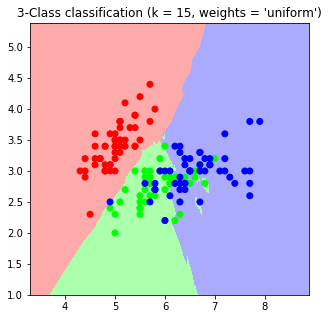

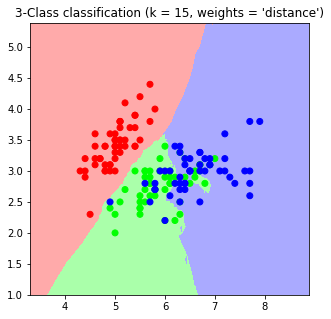

In [4]:
n_neighbors = 15 

iris = datasets.load_iris() # load the iris data
X = iris.data[:,:2]  # we only take the first two features of the data
y = iris.target # labels of data

h = 0.01 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)# train
    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

In [5]:
np.shape(iris.data)

(150, 4)

### Exercise / Unhomework 

- Which two features work best to predict the classes of the iris dataset?
- How much better/worse than using all features

In [6]:
import datetime as dt
from sklearn import neighbors

for k in [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],[0,1,2,3]]:
    print('For features:')
    print(k)
    X = iris.data[:,k] # using only 2 features for each
    y = iris.target
  

    start = dt.datetime.now()
    clf = neighbors.KNeighborsClassifier(5)
    y_pred = clf.fit(X,y).predict(X)

    print ("Elapsed time", dt.datetime.now()-start)
    print("Number of mislabeled points out of a total %d points: %d"
          % (iris.target.size, (iris.target!=y_pred).sum()))
    print("======================================")

For features:
[0, 1]
Elapsed time 0:00:00.008064
Number of mislabeled points out of a total 150 points: 25
For features:
[0, 2]
Elapsed time 0:00:00.008666
Number of mislabeled points out of a total 150 points: 5
For features:
[0, 3]
Elapsed time 0:00:00.006631
Number of mislabeled points out of a total 150 points: 5
For features:
[1, 2]
Elapsed time 0:00:00.007845
Number of mislabeled points out of a total 150 points: 6
For features:
[1, 3]
Elapsed time 0:00:00.006776
Number of mislabeled points out of a total 150 points: 6
For features:
[2, 3]
Elapsed time 0:00:00.007026
Number of mislabeled points out of a total 150 points: 6
For features:
[0, 1, 2, 3]
Elapsed time 0:00:00.010377
Number of mislabeled points out of a total 150 points: 5


#### Still cheating! Our training data and testing data are the same!!
***You can get a subset in iris data as training data and remaining as testing data.***

### Redo it！

In [7]:
import datetime as dt
from sklearn import neighbors

### Further Questions

# Q1
- From data $D$ we can **infer** the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D) = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$ 
>

1. Identify which part of the above equation is associated with prior, posterior, likelihood function and normalization factor?
2. What's their physical meaning to researcher in an experiment respectively?


 P($\theta$): prior<br>
 P($\theta \lvert D$): posterior<br>
 P(D|$\theta$) is the likelihood (also a conditional probability), which we derive from our data<br>
 P(D) is a normalization constant to make the probability distribution sum to 1<br>

# Q2
In a TV Game show, a contestant selects one of three doors; behind one of the doors there is a prize, and behind the other two there are no prizes. After the contestant selects a door, the game-show host opens one of the remaining doors, and reveals that there is no prize behind it. The host then asks the contestant whether they want to SWITCH their choice to the other unopened door, or STICK to their original choice. Is it probabilistically advantageous for the contestant to SWITCH doors, assuming that the host selects a door to open, from those available, with equal probability. The probabilty of SWITCH is 2/3 and STICK is 1/3.

1. Derive this result using Bayes Theroem.
2. Confirm your result using Monte Carlo simulation with 1000 trials.

[link](http://www.math.mcgill.ca/~dstephens/323/Handouts/Math323-01-MontyHall.pdf)

# Q3
1. Implement k nearest neighbor and naive bayes classfier on the below fruit identification dataset fruit_label using the last four column (https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt) with your choice of k for k mean. Do not use sklearn package, implement the equation using Python.
2. Visualize your result.
3. Show the calculation for the first row in the dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits

/Users/AkilanMeiyappan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] File b'fruit_data_with_colors.txt' does not exist: b'fruit_data_with_colors.txt'

# Q4

Consider a fictional dataset that describes the weather conditions for playing a game of golf. Given the weather conditions, each tuple classifies the conditions as “Yes” or “No” for plaing golf.

 | INDEX |  OUTLOOK  |   TEMPERATURE   |  HUMILITY  |  WINDY  |  PLAY GOLF  |
 |:-----:|:---------:|:---------------:|:----------:|:-------:|:-----------:|
 |0| Overcast | Hot | High | False | Yes |  
 |1| Overcast | Cool | Normal | True  | Yes |
 |2| Overcast | Mild | High | True | Yes |
 |3| Overcast | Hot | Normal | False  | Yes |
 |4| Rainy | Mild | High | False  | Yes |
 |5| Rainy | Cool | Normal | False  | Yes |
 |6| Rainy | Cool | Normal | True  | No |
 |7| Rainy | Mild | Normal | False  | Yes |
 |8| Rainy | Mild | High | True  | No |
 |9| Sunny | Hot | High | False  | No |
 |10| Sunny | Hot | High | True  | No |
 |11| Sunny | Mild | High | False  | No |
 |12| Sunny | Cool | Normal | False  | Yes |
 |13| Sunny | Mild | Normal | True  | Yes |


The dataset is divided into two parts, namely, features and target. Features are ‘Outlook’, ‘Temperature’, ‘Humidity’ and ‘Windy’. Target is 'Play Golf'.

The fundamental Naive Bayes assumption is that each feature makes an:

- independent

- equal

contribution to the outcome.

With relation to our dataset, this concept can be understood as:

We assume that no pair of features are dependent. For example, the temperature being ‘Hot’ has nothing to do with the humidity.

Secondly, each feature is given the same weight(or importance). For example, knowing only temperature and humidity alone can’t predict the outcome accuratey. None of the attributes is irrelevant and assumed to be contributing equally to the outcome.

Note: The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

$$P(A|B) = \displaystyle{\frac{P(B|A)P(A)}{P(B)}}$$

where A and B are events.

- Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.

- P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).

- P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

With regards to the dataset, we can apply Bayes' theorem in following way:

$$\displaystyle{P(y|X) = \frac{P(X|y)P(y)}{P(X)}}$$

where, y is target variable and X is a dependent feature vector (of size n) where:

$$X = \left(x_1, x_2, x_3, ..., x_n\right)$$

e.g. For the second row of dataset, $X = \left(Rainy, Hot, High, True\right)$, $Y = No$

Then we'll have:
$$P(y|x_1, \cdots, x_n) = \frac{P(x_1|y)P(x_2|y)\cdots P(x_n|y)P(y)}{P(x_1)P(x_2) \cdots P(x_n)}$$

Since the denominator remains constant for a given input, we have:
$$P(y|x_1, \cdots, x_n) \propto P(y) \prod_{k=1}^n P(x_i|y)$$

We need to create a classifier model. We find the probability of given set of inputs for all possible values of the target variable y and pick up the output with maximum probablity. This can be expressed as:
$$\displaystyle{y = argmax_y P(y) \prod_{k=1}^n P(x_i|y)} $$



Firstly, we'll calculate $P(x_i|y)$.

e.g $x_i$ = OUTLOOK

|  OUTLOOK  |   Yes   |  No  |  P(Yes)  |  P(No)  |        
|:---------:|:-------:|:----:|:--------:|:-------:|   
|Sunny|2|3|2/9|3/5|
|Overcast|4|0|4/9|0/5|
|Rainy|3|2|3/9|2/5|
|**Total**|**9**|**5**|**100%**|**100%**|

Similarly, we can calculate other features $x_i$ (temperature, humidity and wind).

Then calculate $P(Y)$

|  Y=Play Golf  |  Count |  P(Yes) or P(No)  |        
|:-------------:|:------:|:-----------------:|  
|Yes|9|9/14|
|No|5|5/14|
|**Total**|**14**|**100%**|


Let's test it on a new set of features(today's features):

$X_{today} = (Sunny, Hot, Normal, False)$

So, probablity of playing golf is given by:
$P(Yes|today) = \frac{P(Sunny|Yes)P(Hot|Yes)P(Normal|Yes)P(False|Yes)P(Yes)}{P(Today)}$

$P(No|today) = \frac{P(Sunny|No)P(Hot|No)P(Normal|No)P(False|No)P(No)}{P(Today)}$

As a result,

$P(Yes|today)\propto P(Sunny|Yes)P(Hot|Yes)P(Normal|Yes)P(False|Yes)P(Yes)$

$P(No|today)\propto P(Sunny|No)P(Hot|No)P(Normal|No)P(False|No)P(No)$

Then,

$\displaystyle{P(Yes|today) \propto \frac{2}{9}\cdot \frac{2}{9} \cdot \frac{6}{9} \cdot \frac{6}{9} \cdot \frac{9}{14} \approx 0.0141}$

$\displaystyle{P(No|today) \propto \frac{3}{5}\cdot \frac{2}{5} \cdot \frac{1}{5} \cdot \frac{2}{5} \cdot \frac{5}{14} \approx 0.0069}$

Also, $P(Yes|today) + P(No|today) = 1$

We have

$\displaystyle{P(Yes|today) = \frac{0.0141}{0.0141+0.0069}=0.67}$

$\displaystyle{P(No|today) = \frac{0.0069}{0.0141+0.0069}=0.33}$


As a result, given the features(Sunny, Hot, Normal, False), we can predict the target 'Play Golf' to be 'Yes'


Reference: https://gerardnico.com/data_mining/naive_bayes#example1